## Proyecto 1 - Predicción de Enfermedades Cardíacas
Juan Camilo Bello - 201820698

Nicolas Ricaurte - xxx

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
#Cargo el dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"])

In [56]:
#Analisis de los datos

#Como se ve el dataset
df.shape #Tiene 303 filas y 14 columnas
#Hay valores nulos?
df.isnull().sum() #No hay valores nulos
#Hay valores duplicados?
df.duplicated().sum() #No hay valores duplicados
#Analisis de las variables
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


Se tienen 303 datos en total donde cada variable se resume de la siguiente forma:

Edad: La media es 54 años, donde 28 es el min y 77 el max

Sexo: Hay 207 hombres y 96 mujeres en la base de datos, es decir 68% son hombres y 32% mujeres del total

CP (Chest Pain) (Es una variable que se divide en 4 (1: Angina tipica, 2: Angina atipica, 3: Dolor no relacionado con la angina, 4: Asintomatico)): Hay un 54% de personas con agina tipo 2, un 23% con angina tipo 1, un 16% con angina tipo 3 y un 7% con angina tipo 4. Es decir, hay 165 personas con angina tipo 2, 75 con angina tipo 1, 50 con angina tipo 3 y 23 con angina tipo 4.

trestbps (Resting blood preassure)(Se toma como la presion sistolica)(Baja: <90, Normal: <120, prehipertension: <130, Hypertension grado 1: <140, Hypertension grado 2: <180+): La media se encuentra en 131.68 mmHg, Baja: 0 pacientes, Normal: 97 pacientes, prehipertension: 74 pacientes, Hypertension grado 1: 66 pacientes, Hypertension grado 2: 66 pacientes.

chol (Serum cholestoral mg/dl) (): *****

fbs (Fasting blood sugar)

restecg (Resting electrocardiographic results) (0: normal, 1: )

In [62]:
#Que porcentaje de personas son hombres?
df['sex'].value_counts(normalize=True) #Hay un 68% de hombres y un 32% de mujeres
#Total datos en el data set
df['sex'].value_counts() #Hay 207 hombres y 96 mujeres

1.0    206
0.0     97
Name: sex, dtype: int64

In [64]:
#Para la variable cp
df['cp'].value_counts(normalize=True) #Hay un 54% de personas con angina tipo 2, un 23% con angina tipo 1, un 16% con angina tipo 3 y un 7% con angina tipo 4
df['cp'].value_counts() #Hay 165 personas con angina tipo 2, 75 con angina tipo 1, 50 con angina tipo 3 y 23 con angina tipo 4

4.0    144
3.0     86
2.0     50
1.0     23
Name: cp, dtype: int64

In [83]:
#Para la variable trestbps
#cuantos pacientes se encuentran por debajo de 90?
print(df[df['trestbps'] < 90].shape) #Hay 0 pacientes
#cuantos pacientes se encuentran entre 90 y 120?
print(df[(df['trestbps'] >= 90) & (df['trestbps'] <= 120)].shape) #Hay 97 pacientes
#cuantos pacientes se encuentran entre 120 y 130?
print(df[(df['trestbps'] > 120) & (df['trestbps'] <= 130)].shape) #Hay 74 pacientes
#cuantos pacientes se encuentran entre 130 y 140?
print(df[(df['trestbps'] > 130) & (df['trestbps'] <= 140)].shape) #Hay 66 pacientes
#cuantos pacientes se encuentran entre 140 y 180+?
print(df[(df['trestbps'] > 140)].shape) #Hay 66 pacientes

(0, 14)
(97, 14)
(74, 14)
(66, 14)
(66, 14)


<AxesSubplot:title={'center':'Enfermedad cardiaca'}>

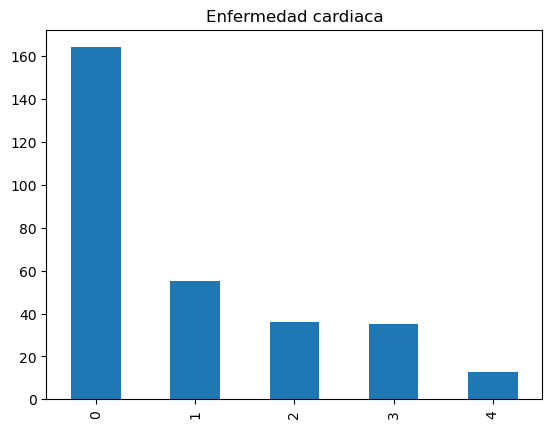

In [58]:
#Analisis de la variable num
df['num'].value_counts() #Hay 164 pacientes con enfermedad cardiaca y 139 sin enfermedad cardiaca
#Grafico de la variable num
df['num'].value_counts().plot(kind='bar', title='Enfermedad cardiaca')
#si es 0 no tiene enfermedad cardiaca, si es diferente de 0 tiene enfermedad cardiaca y el numero indica la severidad de la enfermedad

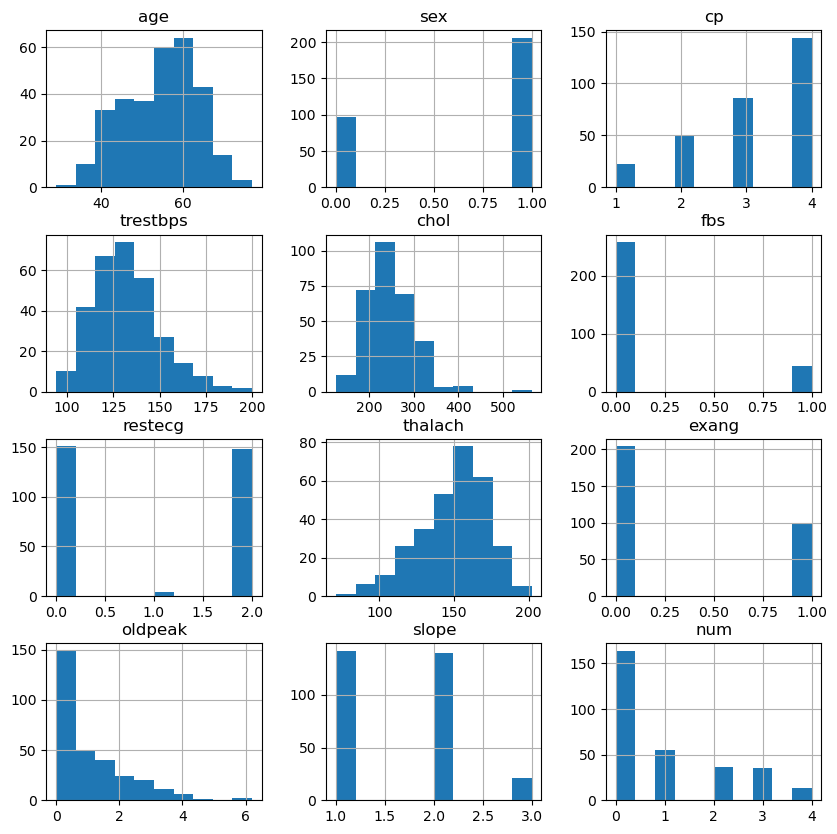

In [55]:
#Analisis de las variables numericas
df.hist(figsize=(10,10))
plt.show()

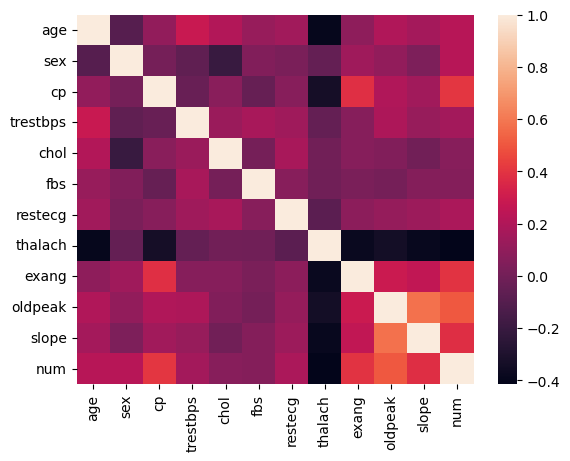

In [15]:
#hacer una grafica de correlacion entre las variables
import seaborn as sns
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

El grafico anterior se lee de la siguiente manera: 

- Cuanto mas cerca de 1, mas correlacion hay entre las variables
- Cuanto mas cerca de -1, menos correlacion hay entre las variables
- Cuanto mas cerca de 0, no hay correlacion entre las variables

Las variables que tienen correlacion son las que estan en la diagonal con esto en mente podemos ver que las variables que tienen mayor correlacion son:

1. exang y cp con un valor de 0.43
2. exang y oldpeak con un valor de 0.29
3. cp y oldpeak con un valor de 0.28
4. thalach y oldpeak con un valor de -0.34
5. thalach y slope con un valor de -0.39
6. oldpeak y slope con un valor de -0.58
7. ca y thal con un valor de 0.52
8. ca y num con un valor de 0.46
9. thal y num con un valor de 0.52

los valores negativos indican que mientras una variable aumenta, la otra disminuye y viceversa (inversamente proporcional) y los valores positivos indican que mientras una variable aumenta, la otra tambien aumenta (directamente proporcional)